In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Datasets/mnist_train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
vals = data.values

In [5]:
X = vals[:,1:]
Y = vals[:,0]

In [6]:
print(X.shape,Y.shape)

(42000, 784) (42000,)


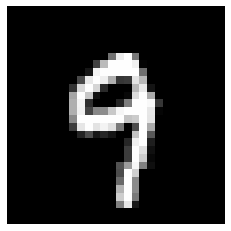

In [13]:
plt.imshow(X[8009].reshape(28,28),cmap='gray')
plt.axis('off')
plt.show()

In [12]:
Y[8009]

9

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc  = StandardScaler()

In [21]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [18]:
sc.fit_transform()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_ = sc.fit_transform(X)

In [23]:
X_.shape

(42000, 784)

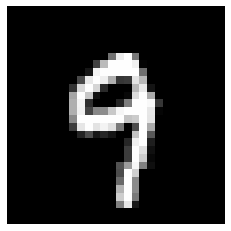

In [24]:
plt.imshow(X[8009].reshape(28,28),cmap='gray')
plt.axis('off')
plt.show()

In [25]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=2)

In [62]:
z_pca = pca.fit_transform(X_)

In [63]:
z_pca.shape

(42000, 2)

In [64]:
z_pca

array([[-5.14045486, -5.22689311],
       [19.29236451,  6.03246398],
       [-7.64452882, -1.70519907],
       ...,
       [ 0.49535674,  7.07695679],
       [ 2.30721338, -4.34313386],
       [-4.80773475,  1.5609501 ]])

In [65]:
pca.explained_variance_

array([40.69647874, 29.11146209])

In [70]:
new_data = np.hstack((z_pca,Y.reshape(-1,1)))

In [73]:
dataframe = pd.DataFrame(new_data,columns=['PCA1','PCA2','label'])

In [74]:
dataframe.head()

,PCA1,PCA2,label
0,-5.140455,-5.226893,1.0
1,19.292365,6.032464,0.0
2,-7.644529,-1.705199,1.0
3,-0.474366,5.839465,4.0
4,26.559596,6.024259,0.0


In [66]:
import seaborn as sns

<Figure size 1440x720 with 0 Axes>

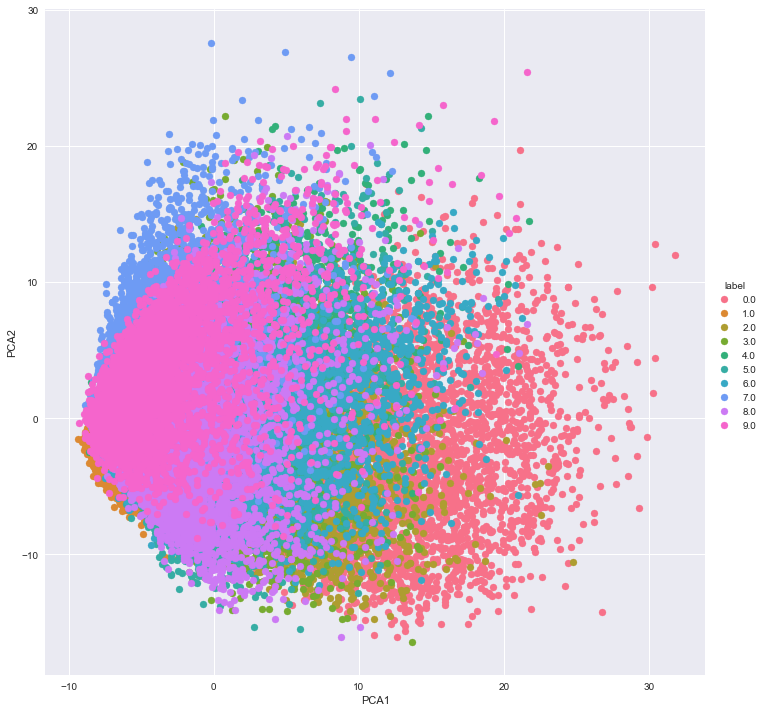

In [84]:
plt.figure(figsize=(20,10))
fg = sns.FacetGrid(dataframe,height=10,hue='label')
fg.map(plt.scatter,'PCA1','PCA2')
fg.add_legend()
plt.show()

## Custom PCA

In [34]:
#covaricane

In [35]:
cov = np.dot(X_.T,X_)

In [37]:
cov.shape

(784, 784)

In [38]:
from numpy.linalg import svd

In [39]:
U,S,V = svd(cov)

In [40]:
U.shape

(784, 784)

In [45]:
u_red = U[:,:2]

In [46]:
u_red.shape

(784, 2)

In [47]:
z = np.dot(X_,u_red)

In [48]:
z.shape

(42000, 2)

In [49]:
z

array([[-5.14047772, -5.2264454 ],
       [19.29233234,  6.03299601],
       [-7.64450341, -1.70581328],
       ...,
       [ 0.49539137,  7.07627667],
       [ 2.30724011, -4.34451279],
       [-4.80767022,  1.55912058]])

In [50]:
pca = PCA()

In [51]:
z = pca.fit_transform(X_)

In [52]:
z.shape

(42000, 784)

In [53]:
z

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
        -1.05964850e-15,  3.00039008e-15, -1.91106485e-15],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
        -1.99075793e-15,  3.09160840e-15, -1.87908622e-15],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
        -2.75240758e-17,  3.63928461e-18,  6.63636662e-18],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
        -3.08799631e-17, -2.06613036e-17,  7.73758668e-18],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
        -8.68609132e-18, -1.43608381e-17,  1.57110002e-17]])

In [54]:
pca.explained_variance_

array([4.06964787e+01, 2.91114657e+01, 2.67833371e+01, 2.08147194e+01,
       1.81000206e+01, 1.57876737e+01, 1.38244007e+01, 1.25432643e+01,
       1.10638975e+01, 1.00889267e+01, 9.63617203e+00, 8.65579470e+00,
       8.04120472e+00, 7.88086691e+00, 7.43637560e+00, 7.16743699e+00,
       6.73538375e+00, 6.61651973e+00, 6.42354578e+00, 6.26826675e+00,
       5.93960379e+00, 5.74928832e+00, 5.48826880e+00, 5.32649477e+00,
       5.15217038e+00, 4.94730998e+00, 4.88853571e+00, 4.70777145e+00,
       4.46528559e+00, 4.36351702e+00, 4.32543150e+00, 4.22712324e+00,
       4.08726514e+00, 4.06176768e+00, 3.99903435e+00, 3.86804997e+00,
       3.81925839e+00, 3.71256507e+00, 3.57437538e+00, 3.45887625e+00,
       3.41436841e+00, 3.36945857e+00, 3.25693182e+00, 3.24008824e+00,
       3.18312949e+00, 3.16286640e+00, 3.14244041e+00, 3.09287815e+00,
       3.06368054e+00, 3.02342271e+00, 2.96849737e+00, 2.91830693e+00,
       2.84948896e+00, 2.82806029e+00, 2.79589667e+00, 2.76696531e+00,
      

In [55]:
pca.explained_variance_ratio_

array([5.74795336e-02, 4.11169103e-02, 3.78286715e-02, 2.93986212e-02,
       2.55643921e-02, 2.22984433e-02, 1.95255247e-02, 1.77160531e-02,
       1.56266017e-02, 1.42495571e-02, 1.36100884e-02, 1.22254076e-02,
       1.13573634e-02, 1.11309029e-02, 1.05031053e-02, 1.01232575e-02,
       9.51302738e-03, 9.34514435e-03, 9.07258876e-03, 8.85327331e-03,
       8.38907114e-03, 8.12027039e-03, 7.75160752e-03, 7.52311857e-03,
       7.27690355e-03, 6.98755959e-03, 6.90454706e-03, 6.64923638e-03,
       6.30675038e-03, 6.16301289e-03, 6.10922106e-03, 5.97037089e-03,
       5.77283590e-03, 5.73682340e-03, 5.64821911e-03, 5.46321734e-03,
       5.39430432e-03, 5.24361113e-03, 5.04843259e-03, 4.88530211e-03,
       4.82243943e-03, 4.75900896e-03, 4.60007666e-03, 4.57628685e-03,
       4.49583855e-03, 4.46721905e-03, 4.43836948e-03, 4.36836795e-03,
       4.32712937e-03, 4.27026938e-03, 4.19269307e-03, 4.12180430e-03,
       4.02460610e-03, 3.99434033e-03, 3.94891257e-03, 3.90805004e-03,
      

In [57]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

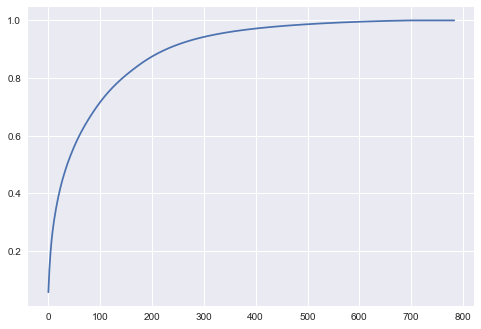

In [60]:
plt.style.use('seaborn')
plt.plot(cum_sum)
plt.show()